In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
import scipy.stats as stats

sns.set_style('darkgrid')
pyo.init_notebook_mode()
%matplotlib inline


plt.rc('figure',figsize=(18,11))
sns.set_context('paper',font_scale=2)

In [3]:
train_df = pd.read_csv('historical_weather.csv')
train_df.head()

city_id        date  avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  \
0    C001  2014-01-01         6.6        -1.4        11.6               NaN   
1    C001  2014-01-02         9.3         6.3        13.3               NaN   
2    C001  2014-01-03         7.6         1.9        14.0               NaN   
3    C001  2014-01-04         7.6         3.9        13.3               NaN   
4    C001  2014-01-05         8.6         0.5        16.9               NaN   

   snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  
0            NaN             168.0                 6.2  
1            NaN             155.0                10.0  
2            NaN               NaN                 5.8  
3            NaN             291.0                11.3  
4            NaN               NaN                 5.0

In [4]:
train_df.shape

(182338, 9)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             182338 non-null  object 
 1   date                182338 non-null  object 
 2   avg_temp_c          181114 non-null  float64
 3   min_temp_c          176452 non-null  float64
 4   max_temp_c          174845 non-null  float64
 5   precipitation_mm    112594 non-null  float64
 6   snow_depth_mm       12238 non-null   float64
 7   avg_wind_dir_deg    146944 non-null  float64
 8   avg_wind_speed_kmh  159866 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.5+ MB


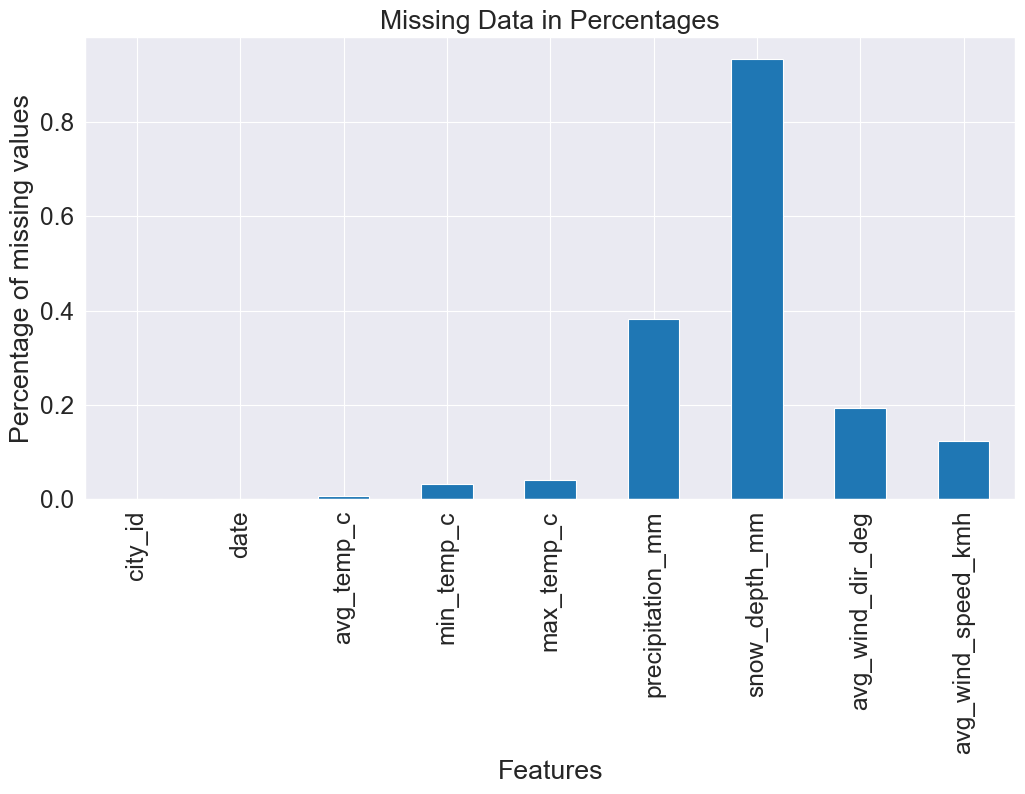

city_id                0.000000
date                   0.000000
avg_temp_c             0.671281
min_temp_c             3.228071
max_temp_c             4.109401
precipitation_mm      38.249844
snow_depth_mm         93.288289
avg_wind_dir_deg      19.411203
avg_wind_speed_kmh    12.324365
dtype: float64

In [6]:
# percentages of missing values 
train_df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages')
plt.show()

train_df.isnull().mean()*100 

In [7]:
df = train_df.copy()
df.head(5)

city_id        date  avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  \
0    C001  2014-01-01         6.6        -1.4        11.6               NaN   
1    C001  2014-01-02         9.3         6.3        13.3               NaN   
2    C001  2014-01-03         7.6         1.9        14.0               NaN   
3    C001  2014-01-04         7.6         3.9        13.3               NaN   
4    C001  2014-01-05         8.6         0.5        16.9               NaN   

   snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  
0            NaN             168.0                 6.2  
1            NaN             155.0                10.0  
2            NaN               NaN                 5.8  
3            NaN             291.0                11.3  
4            NaN               NaN                 5.0

In [8]:
df.drop(['snow_depth_mm', 'precipitation_mm'], axis=1, inplace=True)
df.head()

city_id        date  avg_temp_c  min_temp_c  max_temp_c  avg_wind_dir_deg  \
0    C001  2014-01-01         6.6        -1.4        11.6             168.0   
1    C001  2014-01-02         9.3         6.3        13.3             155.0   
2    C001  2014-01-03         7.6         1.9        14.0               NaN   
3    C001  2014-01-04         7.6         3.9        13.3             291.0   
4    C001  2014-01-05         8.6         0.5        16.9               NaN   

   avg_wind_speed_kmh  
0                 6.2  
1                10.0  
2                 5.8  
3                11.3  
4                 5.0

In [9]:
df = df.dropna(subset=['avg_temp_c'])

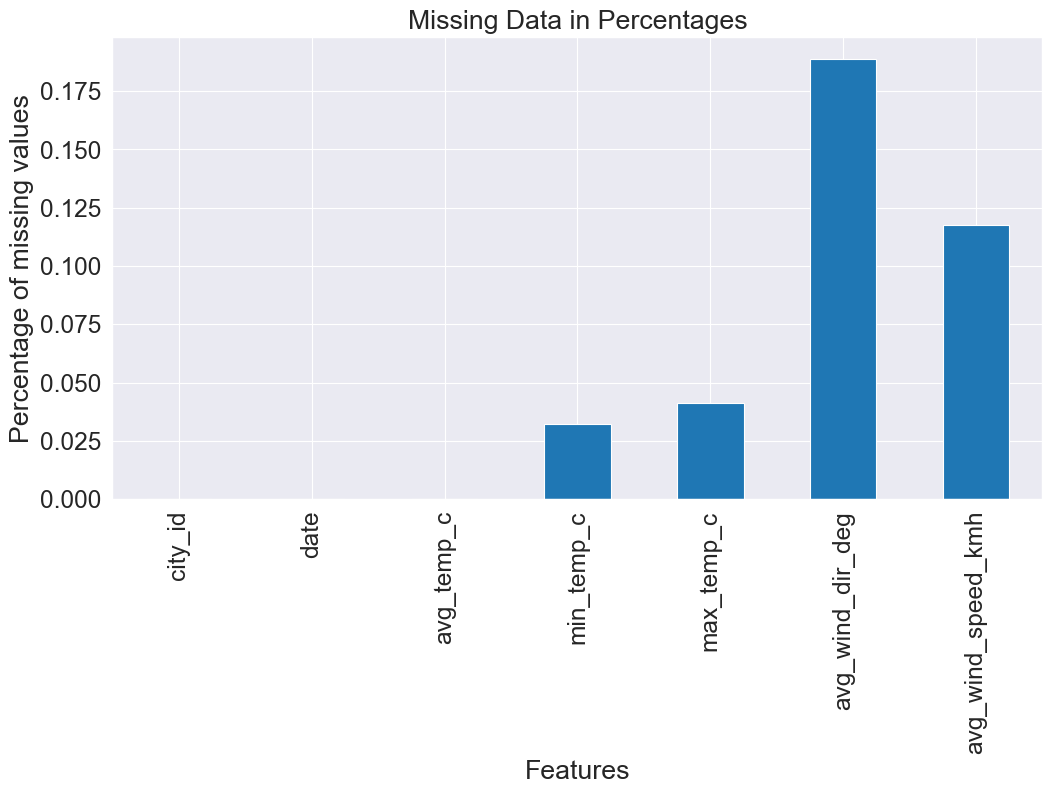

city_id                0.000000
date                   0.000000
avg_temp_c             0.000000
min_temp_c             3.242157
max_temp_c             4.124474
avg_wind_dir_deg      18.867122
avg_wind_speed_kmh    11.767174
dtype: float64

In [10]:
# percentages of missing values 
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages')
plt.show()

df.isnull().mean()*100 

In [11]:
correct_format = '%Y-%m-%d'
df['date'] = pd.to_datetime(df['date'], format=correct_format)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181114 entries, 0 to 182337
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city_id             181114 non-null  object        
 1   date                181114 non-null  datetime64[ns]
 2   avg_temp_c          181114 non-null  float64       
 3   min_temp_c          175242 non-null  float64       
 4   max_temp_c          173644 non-null  float64       
 5   avg_wind_dir_deg    146943 non-null  float64       
 6   avg_wind_speed_kmh  159802 non-null  float64       
 7   year                181114 non-null  int32         
 8   month               181114 non-null  int32         
 9   day                 181114 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(1)
memory usage: 13.1+ MB


In [13]:
df = df.set_index('date')
df.head()

city_id  avg_temp_c  min_temp_c  max_temp_c  avg_wind_dir_deg  \
date                                                                       
2014-01-01    C001         6.6        -1.4        11.6             168.0   
2014-01-02    C001         9.3         6.3        13.3             155.0   
2014-01-03    C001         7.6         1.9        14.0               NaN   
2014-01-04    C001         7.6         3.9        13.3             291.0   
2014-01-05    C001         8.6         0.5        16.9               NaN   

            avg_wind_speed_kmh  year  month  day  
date                                              
2014-01-01                 6.2  2014      1    1  
2014-01-02                10.0  2014      1    2  
2014-01-03                 5.8  2014      1    3  
2014-01-04                11.3  2014      1    4  
2014-01-05                 5.0  2014      1    5

In [14]:
df['city_id'].value_counts()

city_id
C001    1826
C036    1826
C038    1826
C039    1826
C093    1826
        ... 
C112    1800
C056    1789
C094    1789
C082    1756
C097     725
Name: count, Length: 100, dtype: int64

In [15]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df['avg_temp_c'])

(-28.019602365661544,
 0.0,
 79,
 181034,
 {'1%': -3.4303861224561425,
  '5%': -2.8615559656384386,
  '10%': -2.5667784979369426},
 733951.3868088642)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['city_id'])
df['city_id'] = label_encoder.transform(df['city_id'])

In [17]:
df1 = df[np.logical_and(df.index.year < 2018, df['city_id']==59)]
df1.isna().sum()

city_id                 0
avg_temp_c              0
min_temp_c             65
max_temp_c             65
avg_wind_dir_deg      114
avg_wind_speed_kmh     71
year                    0
month                   0
day                     0
dtype: int64

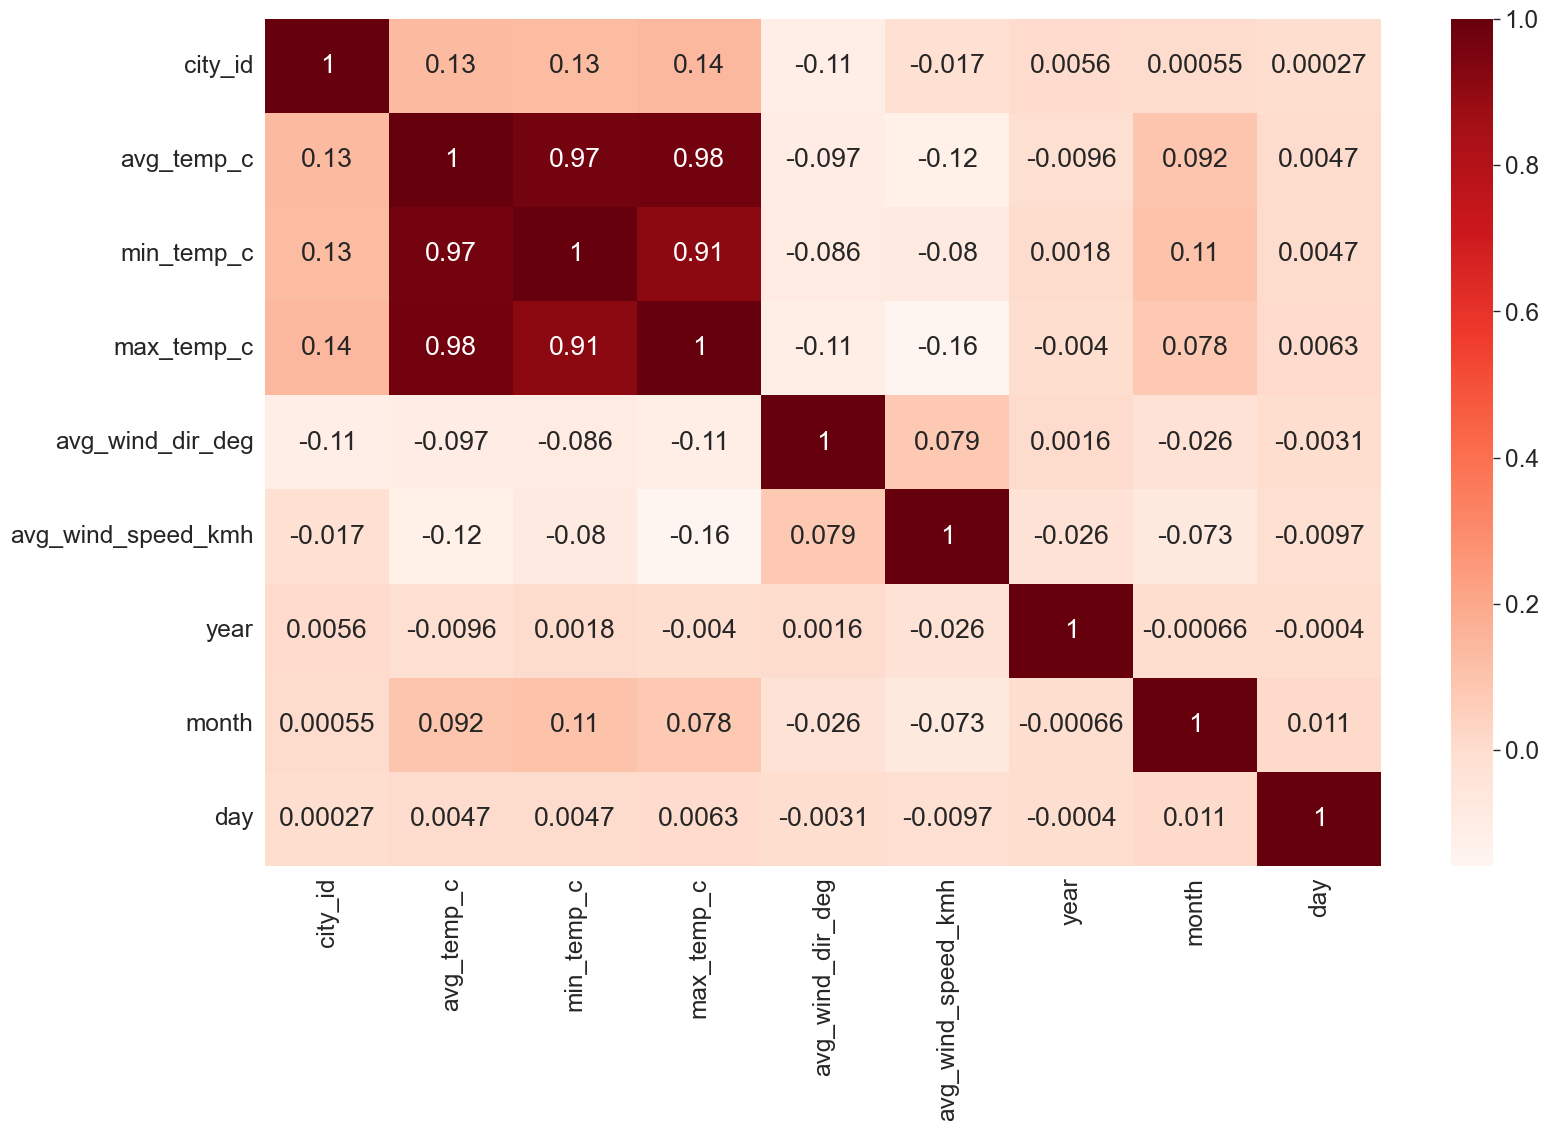

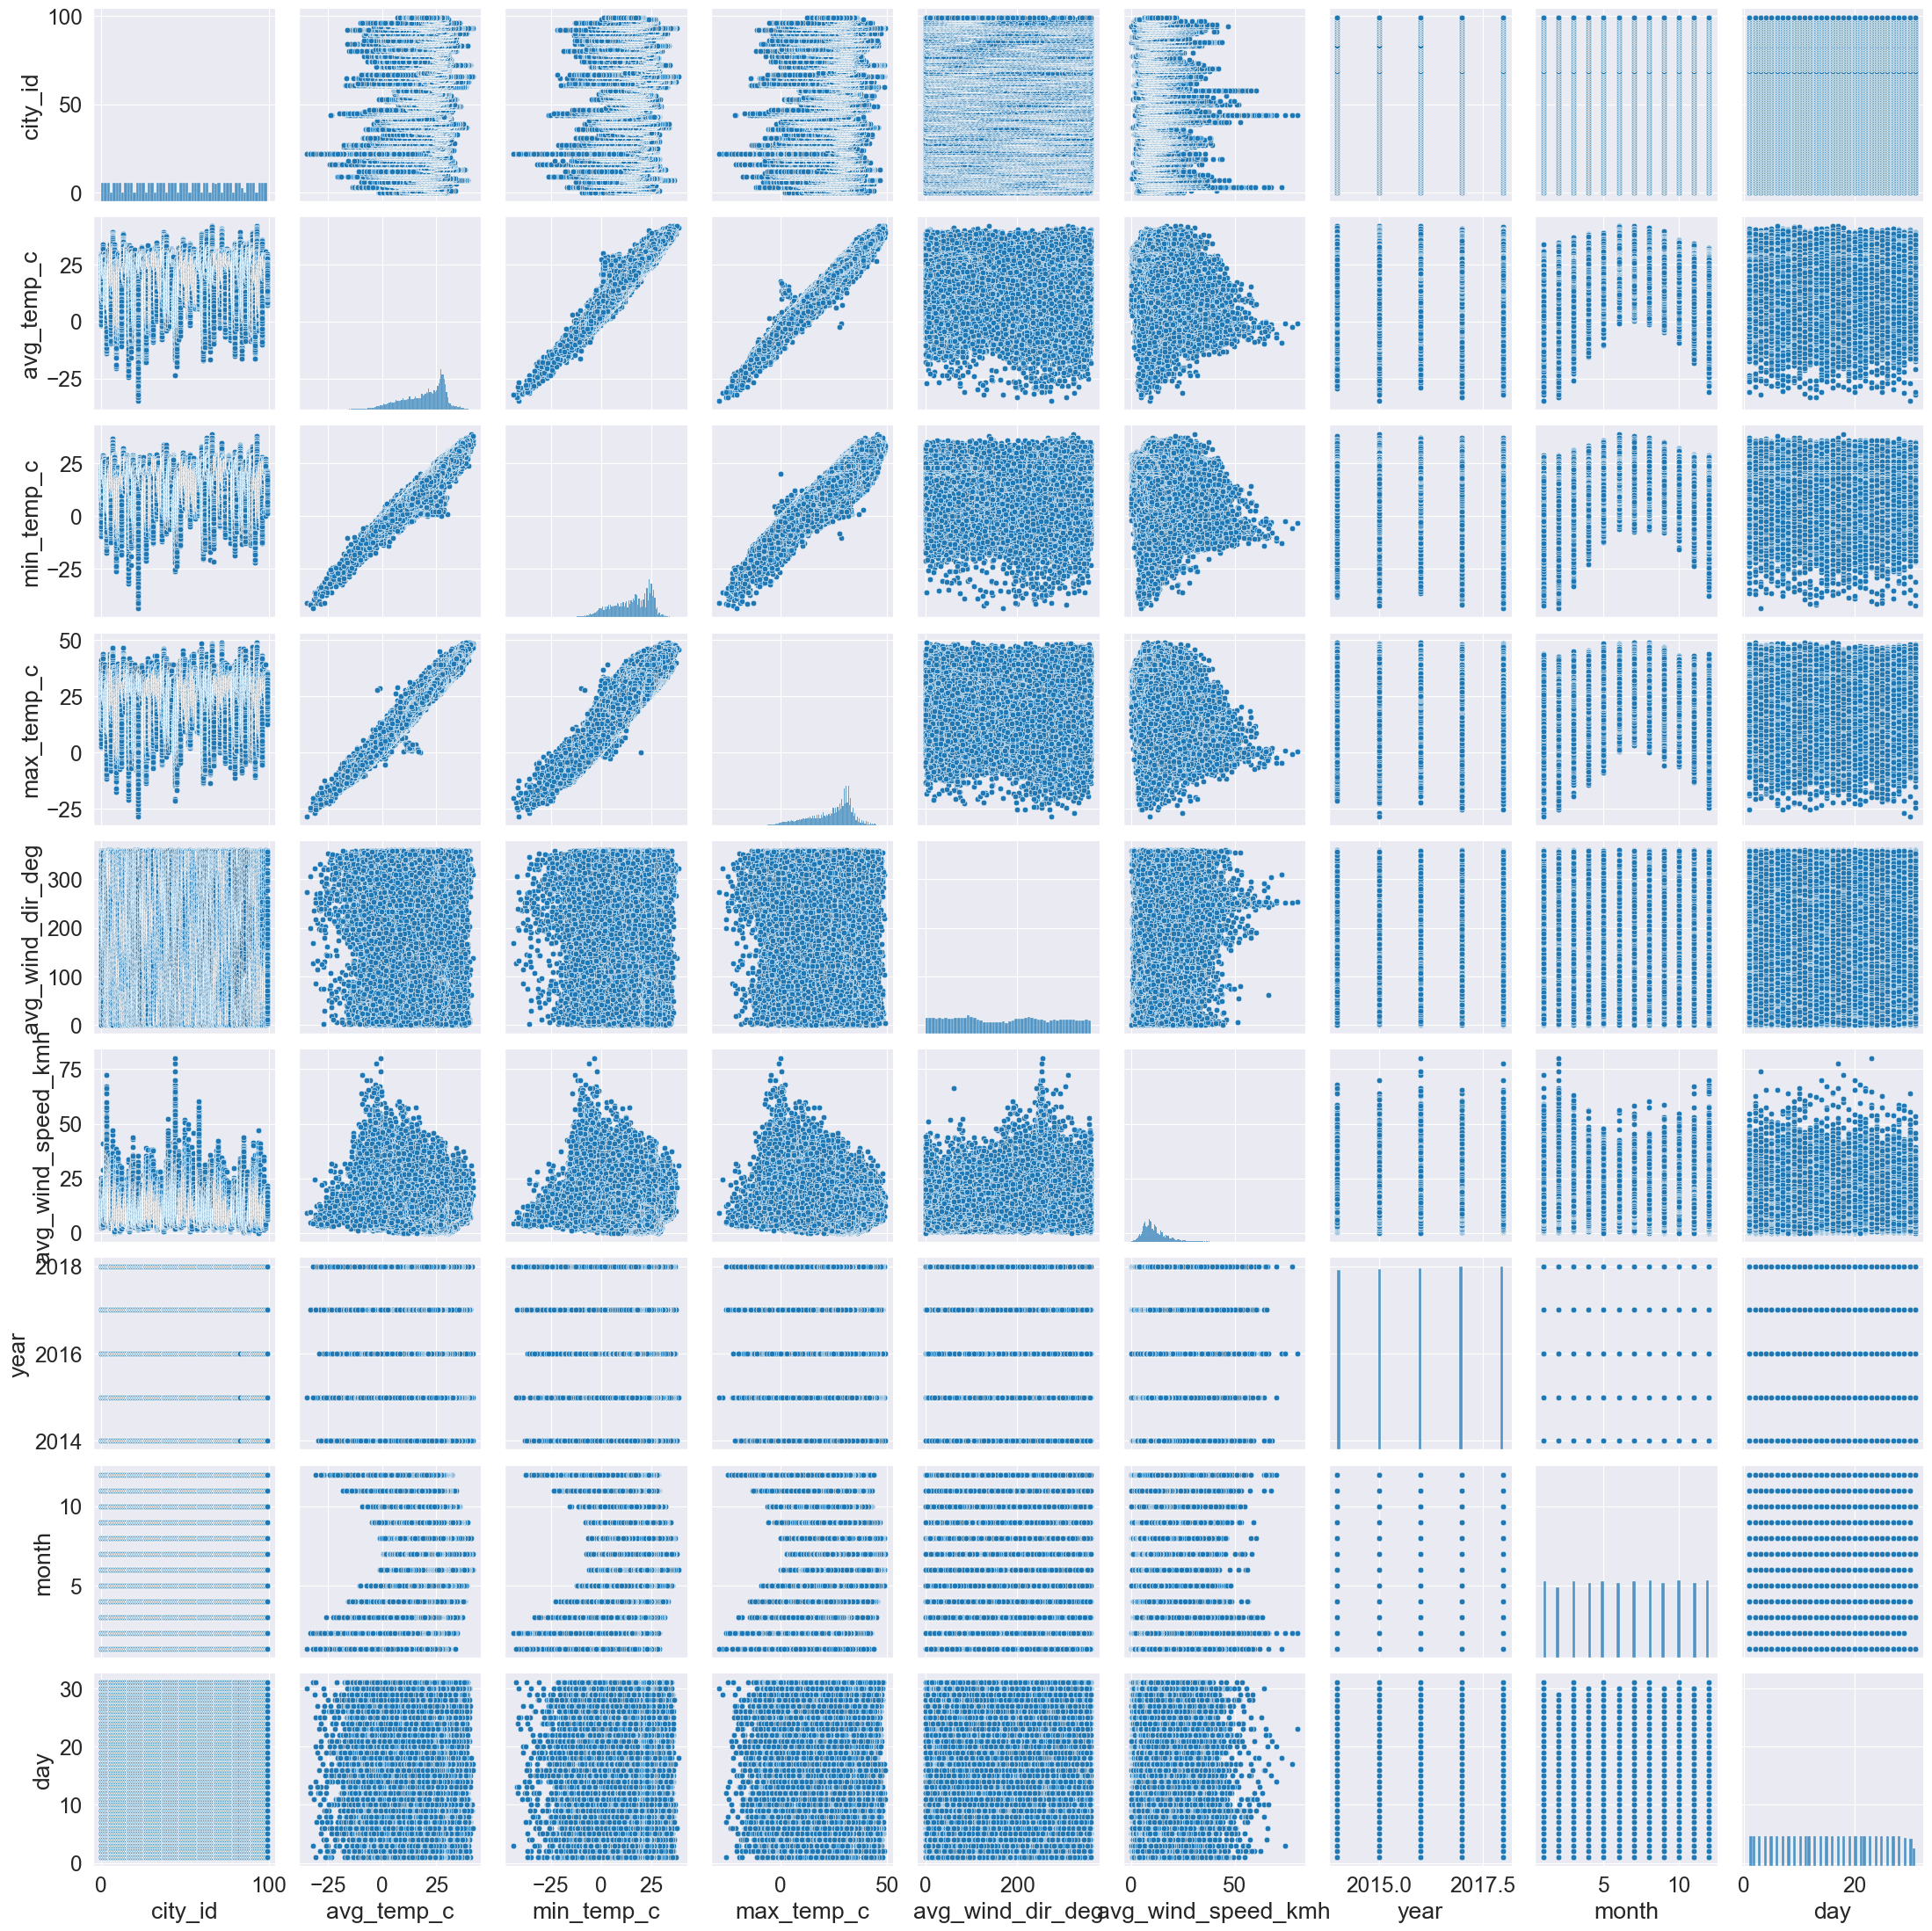

In [18]:
sns.heatmap(df.corr(), annot = True, cmap="Reds")
df_temp = df.reset_index()
sns.pairplot(df_temp)
plt.show()

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, TargetEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['max_temp_c', 'min_temp_c', 'avg_wind_dir_deg', 'avg_wind_speed_kmh']
target_encode_feature = ['month', 'city_id', 'year', 'day']

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

#frequency_encoding_transformer = Pipeline(steps=[
#    ('frequency_encoder', FrequencyEncoder(columns=frequency_encode_feature))
#])
target_encode_transformer = Pipeline(steps=[
    ('target_encode', TargetEncoder(categories = 'auto', smooth= 'auto', target_type='continuous')),
    ('scaler', MinMaxScaler())
])

#nominal_transformer = Pipeline(steps=[
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Using ColumnTransformer to apply different preprocessing steps to numerical, ordinal, and nominal categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('target', target_encode_transformer, target_encode_feature)
    ])

# Define the final pipeline to preprocess the data before fitting the model
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [20]:
from lazypredict.Supervised import LazyRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor

In [21]:
model_dict = {}
rmse_list = []
for city in df['city_id'].unique():
    print('\n\n', city, '\n')
    # train set(df1) and test set(df2)
    df1 = df[np.logical_and(df['year'] != 2018, df['city_id']==city)]
    df2 = df[np.logical_and(df['year'] == 2018, df['city_id']==city)]

    train_set = df1.copy()
    test_set = df2.copy()

    # Impute Missing Values with Label Matching Mean from respective city_id
    for col in ['max_temp_c', 'min_temp_c']:
        train_set[col] = df1[col].fillna(df1[col].mean())
        test_set[col] = df2[col].fillna(df1[col].mean())

    # new train and test sets
    X_train=train_set.drop(['avg_temp_c'], axis=1)
    y_train=train_set['avg_temp_c']

    X_test=test_set.drop(['avg_temp_c'], axis=1)
    y_test=test_set['avg_temp_c']

    #imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10, random_state=42)
    imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)
    imputer.fit(X_train)

    #imputer = IterativeImputer(random_state=42)
    X_train_new = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
    X_test_new = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    pipeline.fit(X_train_new, y_train)

    # Apply preprocessing to training data
    X_train_preprocessed = pipeline.transform(X_train_new)

    # Apply preprocessing to testing data
    X_test_preprocessed = pipeline.transform(X_test_new)

    reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, random_state=42)
    models, predictions = reg.fit(X_train_preprocessed, X_test_preprocessed, y_train, y_test)
    print(models.head(3))
    model_dict[city] = reg.models[models.head(1).index[0]]
    rmse_list.append(models.head(1)['RMSE'][0])



 0 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:10<00:00,  4.49it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.292676


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:10<00:00,  3.83it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
HuberRegressor                             0.99       0.99  0.75        0.03
LinearSVR                                  0.99       0.99  0.76        0.02
OrthogonalMatchingPursuitCV                0.99       0.99  0.76        0.02


 1 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.73it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 7
[LightGBM] [Info] Start training from score 19.902778


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.60it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
KNeighborsRegressor                          0.92       0.92  1.49        0.02
LGBMRegressor                                0.92       0.92  1.49        0.39
HistGradientBoostingRegressor                0.91       0.91  1.52        1.21


 2 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  7.11it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 7
[LightGBM] [Info] Start training from score 25.823388


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.70it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RandomForestRegressor                    0.92       0.92  0.63        1.40
ExtraTreesRegressor                      0.91       0.91  0.66        0.80
GradientBoostingRegressor                0.91       0.91  0.66        0.25


 3 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 5.587466


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.52it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
PassiveAggressiveRegressor                 1.00       1.00  0.14        0.00
OrthogonalMatchingPursuitCV                1.00       1.00  0.14        0.02
LassoCV                                    1.00       1.00  0.14        0.09


 4 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.61it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 18.229979


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.50it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.97       0.97  0.87        0.33
RANSACRegressor                          0.97       0.97  0.88        0.02
ExtraTreesRegressor                      0.97       0.97  0.88        0.90


 5 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.48it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 13.589178


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.52it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.93       0.93  1.38        0.31
SVR                                          0.93       0.93  1.40        0.16
HistGradientBoostingRegressor                0.93       0.93  1.41        1.07


 6 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.57it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 12.062834


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.56it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
HuberRegressor                0.99       0.99  0.75        0.02
LinearSVR                     0.99       0.99  0.75        0.02
LassoLarsIC                   0.99       0.99  0.76        0.02


 7 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.71it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 28.373922


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.49it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.99       0.99  0.48        0.31
LinearRegression                         0.99       0.99  0.49        0.00
Lars                                     0.99       0.99  0.49        0.02


 8 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.98it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 7
[LightGBM] [Info] Start training from score 26.400694


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.77it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
LinearSVR                                  0.99       0.99  0.49        0.02
HuberRegressor                             0.99       0.99  0.50        0.03
OrthogonalMatchingPursuitCV                0.98       0.99  0.52        0.02


 9 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.80it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 8.015264


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.64it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
OrthogonalMatchingPursuitCV                0.99       0.99  0.69        0.00
TransformedTargetRegressor                 0.99       0.99  0.69        0.00
LinearRegression                           0.99       0.99  0.69        0.02


 10 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.68it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 7
[LightGBM] [Info] Start training from score 11.596914


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.65it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
HuberRegressor                 0.99       0.99  0.54        0.03
RANSACRegressor                0.99       0.99  0.55        0.01
LinearSVR                      0.99       0.99  0.55        0.00


 11 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.60it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 11.734565


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.55it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
KNeighborsRegressor                0.87       0.88  2.93        0.02
ElasticNet                         0.86       0.87  3.07        0.01
ExtraTreesRegressor                0.85       0.85  3.25        0.90


 12 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.22it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 11.422040


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.31it/s]


                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
HuberRegressor                       0.99       0.99  0.91        0.02
LGBMRegressor                        0.99       0.99  0.92        0.42
RandomForestRegressor                0.99       0.99  0.92        1.69


 13 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.74it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 29.186379


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.61it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
LinearSVR                     0.96       0.96  0.62        0.00
HuberRegressor                0.96       0.96  0.62        0.03
LassoCV                       0.96       0.96  0.64        0.09


 14 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 20.936463


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.57it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.69       0.69  0.73        0.08
LinearSVR                      0.66       0.67  0.76        0.01
HuberRegressor                 0.66       0.67  0.76        0.03


 15 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  7.12it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 537
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 28.896715


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.75it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
GradientBoostingRegressor                  0.75       0.76  0.65        0.27
OrthogonalMatchingPursuitCV                0.75       0.76  0.65        0.00
RANSACRegressor                            0.74       0.75  0.66        0.04


 16 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.70it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 1446, number of used features: 7
[LightGBM] [Info] Start training from score 7.047026


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.53it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
ExtraTreesRegressor                1.00       1.00  0.72        0.86
ElasticNetCV                       1.00       1.00  0.81        0.11
SGDRegressor                       1.00       1.00  0.82        0.00


 17 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.94it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 553
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 26.539699


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.72it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
PoissonRegressor                           0.77       0.78  0.81        0.02
OrthogonalMatchingPursuitCV                0.77       0.77  0.81        0.01
LassoCV                                    0.77       0.77  0.81        0.09


 18 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.52it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 13.257153


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.52it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.98       0.98  1.45        0.31
XGBRegressor                                 0.98       0.98  1.53        0.24
HistGradientBoostingRegressor                0.98       0.98  1.56        1.11


 19 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.44it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 26.953936


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:10<00:00,  4.19it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.65       0.66  1.22        0.02
HuberRegressor                 0.64       0.65  1.24        0.03
LinearSVR                      0.64       0.65  1.24        0.02


 20 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:10<00:00,  4.91it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 14.092402


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:10<00:00,  3.84it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
OrthogonalMatchingPursuitCV                0.99       0.99  0.62        0.02
LassoCV                                    0.99       0.99  0.62        0.09
Ridge                                      0.99       0.99  0.62        0.02


 21 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:11<00:00,  5.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 951
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 10.664907


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:12<00:00,  3.35it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
ExtraTreesRegressor                0.99       0.99  0.77        1.30
LinearSVR                          0.99       0.99  0.79        0.02
HuberRegressor                     0.99       0.99  0.80        0.03


 22 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:11<00:00,  5.05it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 1436, number of used features: 7
[LightGBM] [Info] Start training from score 3.080571


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:12<00:00,  3.50it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
OrthogonalMatchingPursuitCV                1.00       1.00  0.06        0.02
LassoLarsCV                                1.00       1.00  0.06        0.02
LarsCV                                     1.00       1.00  0.06        0.02


 23 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:11<00:00,  5.20it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 27.032170


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:11<00:00,  3.53it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RandomForestRegressor                    0.63       0.64  0.88        1.69
GradientBoostingRegressor                0.62       0.63  0.89        0.33
LGBMRegressor                            0.61       0.62  0.90        0.55


 24 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.18it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 1448, number of used features: 7
[LightGBM] [Info] Start training from score 25.913122


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.35it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.52       0.53  0.90        0.09
LGBMRegressor                  0.51       0.52  0.91        0.41
LinearSVR                      0.48       0.50  0.93        0.02


 25 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.66it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 26.842779


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.68it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
SVR                                      0.84       0.84  0.42        0.14
GradientBoostingRegressor                0.84       0.84  0.42        0.24
NuSVR                                    0.84       0.84  0.42        0.16


 26 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.04it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 7.452772


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:10<00:00,  4.16it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.98       0.98  1.22        1.21
ExtraTreesRegressor                          0.98       0.98  1.22        0.94
RandomForestRegressor                        0.98       0.98  1.24        1.73


 27 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.21it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 7.541672


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.28it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.99       0.99  0.78        0.36
ExtraTreesRegressor                      0.99       0.99  0.79        0.90
LinearSVR                                0.99       0.99  0.79        0.02


 28 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.22it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 977
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 12.828405


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.29it/s]


             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                       
LassoCV                    0.99       0.99  0.77        0.09
LassoLarsCV                0.99       0.99  0.77        0.02
LarsCV                     0.99       0.99  0.77        0.03


 29 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  7.16it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 26.955852


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.73it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
LinearSVR                                0.92       0.92  0.32        0.02
SVR                                      0.92       0.92  0.32        0.15
GradientBoostingRegressor                0.92       0.92  0.32        0.24


 30 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.43it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 14.127721


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.44it/s]


              Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                        
XGBRegressor                0.97       0.97  1.41        0.25
MLPRegressor                0.92       0.92  2.45        1.43
LinearSVR                   0.89       0.89  2.87        0.02


 31 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.53it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 873
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 11.450719


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.42it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
ExtraTreesRegressor                        0.99       0.99  0.58        0.89
OrthogonalMatchingPursuitCV                0.99       0.99  0.60        0.02
LinearSVR                                  0.99       0.99  0.60        0.02


 32 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  7.03it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 27.703696


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.62it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
ExtraTreesRegressor                      0.92       0.92  0.44        0.86
GradientBoostingRegressor                0.92       0.92  0.44        0.24
RandomForestRegressor                    0.92       0.92  0.44        1.35


 33 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.51it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 19.355099


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.47it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
LinearSVR                                  0.99       0.99  0.56        0.01
OrthogonalMatchingPursuitCV                0.99       0.99  0.56        0.02
HuberRegressor                             0.99       0.99  0.56        0.03


 34 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 7
[LightGBM] [Info] Start training from score 27.553559


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  4.68it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.84       0.84  0.49        0.27
ExtraTreesRegressor                      0.84       0.84  0.50        0.80
SVR                                      0.84       0.84  0.50        0.14


 35 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.02it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 22.134839


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.38it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.80       0.81  0.63        1.22
NuSVR                                        0.80       0.80  0.64        0.13
SVR                                          0.80       0.80  0.64        0.14


 36 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.46it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 12.365753


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.46it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                1.00       1.00  0.60        0.31
ExtraTreesRegressor                      0.99       0.99  0.63        0.88
HuberRegressor                           0.99       0.99  0.64        0.03


 37 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.41it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 25.268104


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.44it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
LinearSVR                                  0.99       0.99  0.85        0.02
OrthogonalMatchingPursuitCV                0.99       0.99  0.88        0.02
HuberRegressor                             0.99       0.99  0.88        0.04


 38 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.02it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 28.727534


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.49it/s]


             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                       
LassoLarsCV                0.65       0.66  0.58        0.02
LarsCV                     0.65       0.66  0.58        0.03
LassoCV                    0.65       0.66  0.58        0.09


 39 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.46it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 18.808356


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.42it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
HuberRegressor                     1.00       1.00  0.57        0.03
LinearSVR                          1.00       1.00  0.58        0.02
ExtraTreesRegressor                1.00       1.00  0.59        0.86


 40 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.29it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 9.929774


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.33it/s]


                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
ExtraTreesRegressor                  0.97       0.97  0.84        0.93
RandomForestRegressor                0.96       0.96  0.87        1.62
LGBMRegressor                        0.96       0.96  0.87        0.39


 41 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.43it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 871
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.590554


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.40it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
OrthogonalMatchingPursuitCV                0.99       0.99  0.57        0.00
LinearSVR                                  0.99       0.99  0.57        0.02
HuberRegressor                             0.99       0.99  0.57        0.03


 42 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.643053


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.40it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
LinearSVR                     0.99       0.99  0.71        0.02
HuberRegressor                0.99       0.99  0.72        0.03
LassoCV                       0.99       0.99  0.72        0.11


 43 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  5.92it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 666
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 28.545927


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.51it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RandomForestRegressor                    0.20       0.22  0.38        1.51
GradientBoostingRegressor                0.20       0.22  0.38        0.27
AdaBoostRegressor                        0.14       0.16  0.40        0.09


 44 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.19it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score -0.009103


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.31it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
HuberRegressor                 0.99       0.99  0.51        0.03
LinearSVR                      0.99       0.99  0.51        0.02
RANSACRegressor                0.99       0.99  0.51        0.02


 45 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.58it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 930
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 8.042163


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.48it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
HuberRegressor                0.99       0.99  0.66        0.03
LinearSVR                     0.99       0.99  0.66        0.00
ElasticNetCV                  0.99       0.99  0.67        0.09


 46 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.42it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 10.671732


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.39it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
LinearSVR                     0.99       1.00  0.52        0.02
HuberRegressor                0.99       1.00  0.52        0.03
Lars                          0.99       1.00  0.52        0.00


 47 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.26it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 1424, number of used features: 7
[LightGBM] [Info] Start training from score 14.170084


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.44it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RandomForestRegressor                    0.98       0.98  1.20        1.61
GradientBoostingRegressor                0.98       0.98  1.21        0.35
LinearSVR                                0.98       0.98  1.22        0.02


 48 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.63it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 19.125530


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.54it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.95       0.95  0.62        0.02
HuberRegressor                 0.95       0.95  0.64        0.03
LassoCV                        0.95       0.95  0.64        0.09


 49 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.72it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 28.122519


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.51it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.94       0.94  0.70        1.44
ExtraTreesRegressor                          0.94       0.94  0.71        0.91
HistGradientBoostingRegressor                0.94       0.94  0.74        1.12


 50 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.47it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 19.547091


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.44it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
HuberRegressor                             0.99       0.99  0.46        0.03
LinearSVR                                  0.99       0.99  0.46        0.02
OrthogonalMatchingPursuitCV                0.99       0.99  0.47        0.02


 51 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.44it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 21.765685


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.42it/s]


               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                         
LinearSVR                    0.95       0.95  0.48        0.01
SVR                          0.95       0.95  0.49        0.15
LGBMRegressor                0.94       0.94  0.52        0.42


 52 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.800000


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.36it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.99       0.99  0.48        0.35
LinearSVR                                0.99       0.99  0.48        0.02
LGBMRegressor                            0.99       0.99  0.48        0.41


 53 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.73it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 952
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 17.418163


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.55it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.97       0.98  1.40        1.15
LGBMRegressor                                0.97       0.98  1.41        0.39
GradientBoostingRegressor                    0.97       0.97  1.42        0.33


 54 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.57it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 17.213621


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.49it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
ExtraTreesRegressor                0.97       0.97  0.70        0.85
LassoLarsCV                        0.97       0.97  0.70        0.03
LarsCV                             0.97       0.97  0.70        0.02


 55 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 841
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 23.559178


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.43it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
LinearSVR                      0.96       0.96  0.64        0.02
HuberRegressor                 0.96       0.96  0.64        0.03
RANSACRegressor                0.96       0.96  0.64        0.02


 56 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.37it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 1457, number of used features: 7
[LightGBM] [Info] Start training from score 21.009403


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.37it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
LinearSVR                                  0.97       0.97  0.79        0.02
HuberRegressor                             0.97       0.97  0.80        0.02
OrthogonalMatchingPursuitCV                0.97       0.97  0.83        0.02


 57 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.49it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 660
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 18.274127


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.46it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.98       0.99  0.63        0.00
HuberRegressor                 0.98       0.99  0.63        0.02
LinearSVR                      0.98       0.99  0.63        0.03


 58 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.16it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 14.230616


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.31it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.90       0.90  1.04        0.31
RandomForestRegressor                        0.90       0.90  1.05        1.65
HistGradientBoostingRegressor                0.90       0.90  1.06        1.15


 59 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.43it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 27.599316


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.60it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.84       0.85  0.51        0.22
LinearSVR                                0.84       0.84  0.51        0.02
HuberRegressor                           0.83       0.84  0.52        0.03


 60 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.66it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 30.496304


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.55it/s]


              Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                        
ElasticNetCV                0.97       0.97  0.60        0.11
LassoCV                     0.97       0.97  0.60        0.11
Ridge                       0.97       0.97  0.60        0.02


 61 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.32it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 11.598289


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.38it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.99       0.99  1.24        0.83
LGBMRegressor                                0.99       0.99  1.25        0.39
HistGradientBoostingRegressor                0.99       0.99  1.36        1.16


 62 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 7.746612


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.37it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
ElasticNetCV                       0.99       0.99  0.90        0.11
SGDRegressor                       0.99       0.99  0.90        0.00
ExtraTreesRegressor                0.99       0.99  0.91        0.89


 63 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.54it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 766
[LightGBM] [Info] Number of data points in the train set: 1452, number of used features: 7
[LightGBM] [Info] Start training from score 28.472865


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.43it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.99       0.99  0.43        0.02
LassoLarsCV                    0.99       0.99  0.43        0.02
LarsCV                         0.99       0.99  0.43        0.02


 64 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 28.633333


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.46it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
LinearSVR                     0.80       0.80  0.59        0.02
HuberRegressor                0.80       0.80  0.59        0.02
SVR                           0.80       0.80  0.60        0.14


 65 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.25it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 10.339452


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.35it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
LassoLarsIC                    0.99       0.99  0.83        0.02
LassoCV                        0.99       0.99  0.83        0.09
RANSACRegressor                0.99       0.99  0.83        0.02


 66 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.41it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 29.193703


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.42it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
HuberRegressor                0.99       0.99  0.63        0.03
LinearSVR                     0.99       0.99  0.63        0.02
XGBRegressor                  0.99       0.99  0.64        0.25


 67 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.42it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 12.878713


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.41it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
ExtraTreesRegressor                      0.99       0.99  0.88        0.88
RandomForestRegressor                    0.99       0.99  0.92        1.60
GradientBoostingRegressor                0.99       0.99  0.92        0.30


 68 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  5.93it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 20.936463


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.54it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
RANSACRegressor                0.69       0.69  0.73        0.08
LinearSVR                      0.66       0.67  0.76        0.02
HuberRegressor                 0.66       0.67  0.76        0.03


 69 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:07<00:00,  7.47it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 284
[LightGBM] [Info] Number of data points in the train set: 1391, number of used features: 7
[LightGBM] [Info] Start training from score 27.447304


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:08<00:00,  5.08it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.96       0.96  0.32        0.19
LassoLarsCV                              0.95       0.95  0.33        0.02
LarsCV                                   0.95       0.95  0.33        0.02


 70 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.13it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 27.665366


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.36it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
LinearSVR                     0.76       0.77  0.49        0.02
HuberRegressor                0.76       0.77  0.49        0.02
SGDRegressor                  0.76       0.77  0.49        0.02


 71 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.37it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 14.750171


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.39it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
ExtraTreesRegressor                0.99       0.99  0.78        0.86
HuberRegressor                     0.99       0.99  0.79        0.03
LinearSVR                          0.99       0.99  0.79        0.02


 72 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 27.221287


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.36it/s]


                 Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                           
HuberRegressor                 0.99       0.99  0.62        0.03
RANSACRegressor                0.99       0.99  0.63        0.02
LinearSVR                      0.99       0.99  0.63        0.02


 73 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.63it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 764
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 24.812183


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.51it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.96       0.96  0.57        1.45
SVR                                          0.96       0.96  0.59        0.14
HistGradientBoostingRegressor                0.96       0.96  0.60        1.15


 74 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.26it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 14.088159


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.34it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RANSACRegressor                          0.99       0.99  0.74        0.00
HuberRegressor                           0.99       0.99  0.74        0.03
GradientBoostingRegressor                0.99       0.99  0.74        0.33


 75 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.58it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 1447, number of used features: 7
[LightGBM] [Info] Start training from score 27.553559


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.49it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.84       0.84  0.49        0.28
ExtraTreesRegressor                      0.84       0.84  0.50        0.82
SVR                                      0.84       0.84  0.50        0.14


 76 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 28.080835


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.50it/s]


                     Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                               
XGBRegressor                       0.63       0.64  0.61        0.25
LGBMRegressor                      0.63       0.64  0.62        0.39
ExtraTreesRegressor                0.62       0.63  0.62        0.83


 77 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.24it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 12.120425


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.34it/s]


              Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                        
ElasticNetCV                0.99       0.99  0.78        0.09
Ridge                       0.99       0.99  0.78        0.02
SGDRegressor                0.99       0.99  0.78        0.02


 78 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.08it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 27.257192


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.55it/s]


                  Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                            
SGDRegressor                    0.30       0.32  0.77        0.02
PoissonRegressor                0.30       0.32  0.77        0.02
HuberRegressor                  0.30       0.31  0.77        0.02


 79 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.10it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 1445, number of used features: 7
[LightGBM] [Info] Start training from score 18.522215


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.26it/s]


            Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                      
Lasso                     0.58       0.59  2.42        0.00
LassoLars                 0.58       0.59  2.42        0.00
ElasticNet                0.57       0.58  2.47        0.00


 80 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.27it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 13.401985


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.34it/s]


                       Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                 
ExtraTreesRegressor                  0.99       0.99  1.19        0.83
RandomForestRegressor                0.99       0.99  1.21        1.57
BaggingRegressor                     0.99       0.99  1.24        0.17


 81 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.32it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 1425, number of used features: 7
[LightGBM] [Info] Start training from score 15.434947


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.38it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
SGDRegressor                               0.99       0.99  0.79        0.00
LinearSVR                                  0.99       0.99  0.79        0.02
OrthogonalMatchingPursuitCV                0.99       0.99  0.79        0.00


 82 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 1455, number of used features: 7
[LightGBM] [Info] Start training from score 28.016357


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.52it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
GradientBoostingRegressor                  0.75       0.76  0.51        0.27
OrthogonalMatchingPursuitCV                0.75       0.76  0.51        0.02
LassoCV                                    0.74       0.75  0.52        0.09


 83 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.56it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 30.264819


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.42it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.96       0.96  0.93        0.25
ExtraTreesRegressor                      0.96       0.96  0.99        0.83
HuberRegressor                           0.96       0.96  0.99        0.03


 84 



100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 14.00it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 363, number of used features: 6
[LightGBM] [Info] Start training from score 7.128926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.30it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 7
[LightGBM] [Info] Start training from score 18.483059


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.36it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RANSACRegressor                          0.99       0.99  0.93        0.01
GradientBoostingRegressor                0.99       0.99  0.94        0.30
HuberRegressor                           0.99       0.99  0.94        0.03


 86 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.22it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.223340


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.27it/s]


              Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                        
ElasticNetCV                0.99       0.99  0.86        0.09
LassoCV                     0.99       0.99  0.87        0.09
LassoLarsCV                 0.99       0.99  0.87        0.02


 87 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.27it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 692
[LightGBM] [Info] Number of data points in the train set: 1455, number of used features: 7
[LightGBM] [Info] Start training from score 22.767629


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.30it/s]


                  Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                            
HuberRegressor                  0.82       0.82  0.87        0.02
LinearSVR                       0.82       0.82  0.87        0.01
PoissonRegressor                0.81       0.82  0.88        0.02


 88 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.40it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 29.173717


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.39it/s]


                  Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                            
PoissonRegressor                0.85       0.85  0.59        0.00
ElasticNetCV                    0.85       0.85  0.59        0.09
LassoCV                         0.85       0.85  0.59        0.09


 89 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 13.871370


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.45it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.98       0.98  1.26        1.15
RandomForestRegressor                        0.98       0.98  1.30        1.53
ExtraTreesRegressor                          0.98       0.98  1.31        0.83


 90 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.43it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 18.225736


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.43it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                1.00       1.00  0.72        0.30
LinearSVR                                0.99       1.00  0.72        0.02
HuberRegressor                           0.99       1.00  0.72        0.03


 91 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  5.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 1459, number of used features: 7
[LightGBM] [Info] Start training from score 29.082591


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.36it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
RandomForestRegressor                    0.35       0.36  0.59        1.59
GradientBoostingRegressor                0.32       0.33  0.60        0.31
AdaBoostRegressor                        0.31       0.32  0.61        0.11


 92 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.19it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 927
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 9.283973


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.28it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.99       0.99  0.93        0.35
SGDRegressor                             0.99       0.99  0.94        0.02
ElasticNetCV                             0.99       0.99  0.94        0.09


 93 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.32it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 29.211294


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.35it/s]


                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
LinearSVR                                  0.99       0.99  0.57        0.02
OrthogonalMatchingPursuitCV                0.99       0.99  0.58        0.00
ElasticNetCV                               0.99       0.99  0.58        0.09


 94 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 11.925873


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.31it/s]


               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                         
SGDRegressor                 0.99       0.99  0.65        0.00
Ridge                        0.99       0.99  0.65        0.02
BayesianRidge                0.99       0.99  0.65        0.01


 95 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  5.99it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.826078


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.23it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
SGDRegressor                  0.98       0.98  0.79        0.00
HuberRegressor                0.98       0.98  0.79        0.03
LinearSVR                     0.98       0.98  0.79        0.02


 96 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 7
[LightGBM] [Info] Start training from score 16.216427


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.29it/s]


                Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                          
LinearSVR                     1.00       1.00  0.62        0.00
HuberRegressor                1.00       1.00  0.62        0.05
LassoCV                       1.00       1.00  0.62        0.09


 97 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  5.78it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 7
[LightGBM] [Info] Start training from score 24.543288


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.38it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.63       0.64  0.82        1.54
LGBMRegressor                                0.62       0.63  0.83        0.39
HistGradientBoostingRegressor                0.61       0.62  0.84        1.15


 98 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:08<00:00,  6.20it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 1454, number of used features: 7
[LightGBM] [Info] Start training from score 26.785626


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.55it/s]


                           Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                     
GradientBoostingRegressor                0.55       0.56  0.53        0.24
SVR                                      0.55       0.56  0.53        0.14
NuSVR                                    0.53       0.54  0.55        0.14


 99 



 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [00:09<00:00,  6.27it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 1435, number of used features: 7
[LightGBM] [Info] Start training from score 19.399861


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.41it/s]

                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
LinearSVR                                  0.99       0.99  0.33        0.02
HuberRegressor                             0.99       0.99  0.38        0.02
OrthogonalMatchingPursuitCV                0.98       0.98  0.49        0.02


In [22]:
# mean RMSE
np.mean(rmse_list)

0.7637043588038569

In [23]:
# bad fits (city numbers)
bad_pred = [rmse_list.index(i) for i in rmse_list if i>1]
bad_pred

[1, 5, 11, 18, 19, 26, 30, 47, 53, 58, 61, 79, 80, 89]

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [25]:
# optimize bad predictions using bayes search and XGBRegressor
from skopt import BayesSearchCV

# Step 4: Define the Parameter Space
param_space = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 9),
    'min_child_weight': (1, 7),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
    'gamma': (0, 0.3)
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

for city in bad_pred:
    opt = BayesSearchCV(
          estimator=xgb_model,
          search_spaces=param_space,
          n_iter=32,  # Number of parameter settings sampled
          cv=3,  # Cross-validation splitting strategy
          verbose=0,
          random_state=42,
          n_jobs=-1
          )
    # train set(df1) and test set(df2)
    df1 = df[np.logical_and(df.index.month != 1, df['city_id']==city)]
    df2 = df[np.logical_and(df.index.month == 1, df['city_id']==city)]

    train_set = df1.copy()
    test_set = df2.copy()

    # Impute Missing Values with Label Matching Mean/ Median from respective class
    for col in ['max_temp_c', 'min_temp_c']:
        train_set[col] = df1[col].fillna(df1.groupby(['city_id'])[col].transform('mean'))
        test_set[col] = df2[col].fillna(df2.groupby(['city_id'])[col].transform('mean'))

    # new train and test sets
    X_train=train_set.drop(['avg_temp_c'], axis=1)
    y_train=train_set['avg_temp_c']

    X_test=test_set.drop(['avg_temp_c'], axis=1)
    y_test=test_set['avg_temp_c']

    imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)
    imputer.fit(X_train)

    #imputer = IterativeImputer(random_state=42)
    X_train_new = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
    X_test_new = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    pipeline.fit(X_train_new, y_train)

    # Apply preprocessing to training data
    X_train_preprocessed = pipeline.transform(X_train_new)

    # Apply preprocessing to testing data
    X_test_preprocessed = pipeline.transform(X_test_new)

    opt.fit(X_train_preprocessed, y_train)

    model = opt.best_estimator_

    y_pred = model.predict(X_test_preprocessed)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    rmse_list[city] = rmse
    model_dict[city] = model

In [26]:
# optimize bad predictions using optuna

import optuna
from sklearn.ensemble import GradientBoostingRegressor
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

for city in bad_pred:
        
    print('\n\n', city, '\n')
    # train set(df1) and test set(df2)
    df1 = df[np.logical_and(df.index.year < 2018, df['city_id']==city)]
    df2 = df[np.logical_and(df.index.year == 2018, df['city_id']==city)]

    train_set = df1.copy()
    test_set = df2.copy()

    # Impute Missing Values with Label Matching Mean/ Median from respective class
    #for col in ['max_temp_c', 'min_temp_c']:
    #    train_set[col] = df1[col].fillna(df1.groupby(['city_id'])[col].transform('mean'))
     #   test_set[col] = df2[col].fillna(df2.groupby(['city_id'])[col].transform('mean'))

    # new train and test sets
    X_train=train_set.drop(['avg_temp_c'], axis=1)
    y_train=train_set['avg_temp_c']

    X_test=test_set.drop(['avg_temp_c'], axis=1)
    y_test=test_set['avg_temp_c']

    imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)
    imputer.fit(X_train)

    #imputer = IterativeImputer(random_state=42)
    X_train_new = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
    X_test_new = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

    pipeline.fit(X_train_new, y_train)

    # Apply preprocessing to training data
    X_train_preprocessed = pipeline.transform(X_train_new)

    # Apply preprocessing to testing data
    X_test_preprocessed = pipeline.transform(X_test_new)

    def objective(trial):
    # Hyperparameters to tune
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        }

        # Define the model
        model = GradientBoostingRegressor(**params)

        # Evaluate using cross-validation
        cv_score = cross_val_score(model, X_train_preprocessed, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        mean_cv_score = cv_score.mean()

        return mean_cv_score

    study = optuna.create_study(direction='maximize', sampler=TPESampler())
    study.optimize(objective, n_trials=100)

    trial = study.best_trial

    best_model = GradientBoostingRegressor(**trial.params)
    best_model.fit(X_train_preprocessed, y_train)

    y_pred = best_model.predict(X_test_preprocessed)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    rmse_list[city] = rmse
    model_dict[city] = best_model

[I 2024-06-24 20:41:19,004] A new study created in memory with name: no-name-049edf8d-b6bc-400b-accf-6258e52e9d50




 1 



[I 2024-06-24 20:41:22,067] Trial 0 finished with value: -2.7173630791895094 and parameters: {'n_estimators': 262, 'learning_rate': 0.2342301686317299, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 13, 'subsample': 0.6257505219342312, 'max_features': 'log2'}. Best is trial 0 with value: -2.7173630791895094.
[I 2024-06-24 20:41:24,010] Trial 1 finished with value: -2.5672732341834026 and parameters: {'n_estimators': 145, 'learning_rate': 0.27165704022232695, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 20, 'subsample': 0.8580744259963582, 'max_features': 'log2'}. Best is trial 1 with value: -2.5672732341834026.
[I 2024-06-24 20:41:25,961] Trial 2 finished with value: -2.223629446412289 and parameters: {'n_estimators': 420, 'learning_rate': 0.03518662858070916, 'max_depth': 3, 'min_samples_split': 11, 'min_samples_leaf': 1, 'subsample': 0.5098980501217033, 'max_features': 'sqrt'}. Best is trial 2 with value: -2.223629446412289.
[I 2024-06-24 20:41:26,254] Tr



 5 



[I 2024-06-24 20:42:34,158] Trial 0 finished with value: -2.7427978193575533 and parameters: {'n_estimators': 98, 'learning_rate': 0.10765299715645463, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 12, 'subsample': 0.5405107836472134, 'max_features': 'log2'}. Best is trial 0 with value: -2.7427978193575533.
[I 2024-06-24 20:42:34,603] Trial 1 finished with value: -2.981527459310287 and parameters: {'n_estimators': 327, 'learning_rate': 0.15864312052230736, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 15, 'subsample': 0.9043164731997392, 'max_features': 'sqrt'}. Best is trial 0 with value: -2.7427978193575533.
[I 2024-06-24 20:42:35,530] Trial 2 finished with value: -4.733544178686216 and parameters: {'n_estimators': 450, 'learning_rate': 0.29124280291675697, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 6, 'subsample': 0.5559650636072465, 'max_features': 'sqrt'}. Best is trial 0 with value: -2.7427978193575533.
[I 2024-06-24 20:42:38,002] Tri



 11 



[I 2024-06-24 20:43:47,697] Trial 0 finished with value: -1.439756571563515 and parameters: {'n_estimators': 410, 'learning_rate': 0.21407477720982937, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 18, 'subsample': 0.9060640235000905, 'max_features': 'log2'}. Best is trial 0 with value: -1.439756571563515.
[I 2024-06-24 20:43:48,467] Trial 1 finished with value: -1.750843082698322 and parameters: {'n_estimators': 406, 'learning_rate': 0.25919733246185234, 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 16, 'subsample': 0.700176240297679, 'max_features': 'sqrt'}. Best is trial 0 with value: -1.439756571563515.
[I 2024-06-24 20:43:49,432] Trial 2 finished with value: -1.2854251387648261 and parameters: {'n_estimators': 374, 'learning_rate': 0.015335060053925324, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 12, 'subsample': 0.8597011198276603, 'max_features': 'sqrt'}. Best is trial 2 with value: -1.2854251387648261.
[I 2024-06-24 20:43:49,956] T



 18 



[I 2024-06-24 20:45:38,173] Trial 0 finished with value: -3.2015536719046374 and parameters: {'n_estimators': 495, 'learning_rate': 0.18516255939637222, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 16, 'subsample': 0.8885869958376942, 'max_features': 'log2'}. Best is trial 0 with value: -3.2015536719046374.
[I 2024-06-24 20:45:38,472] Trial 1 finished with value: -3.100094633370738 and parameters: {'n_estimators': 81, 'learning_rate': 0.23551465489991202, 'max_depth': 14, 'min_samples_split': 11, 'min_samples_leaf': 17, 'subsample': 0.9252444809028244, 'max_features': 'log2'}. Best is trial 1 with value: -3.100094633370738.
[I 2024-06-24 20:45:38,660] Trial 2 finished with value: -3.0345467396075114 and parameters: {'n_estimators': 64, 'learning_rate': 0.23927409370460428, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 20, 'subsample': 0.6733250858252551, 'max_features': 'log2'}. Best is trial 2 with value: -3.0345467396075114.
[I 2024-06-24 20:45:39,243



 19 



[I 2024-06-24 20:46:57,334] Trial 0 finished with value: -1.3022936841359447 and parameters: {'n_estimators': 305, 'learning_rate': 0.1479029451928601, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 15, 'subsample': 0.7244180991765263, 'max_features': 'sqrt'}. Best is trial 0 with value: -1.3022936841359447.
[I 2024-06-24 20:46:57,668] Trial 1 finished with value: -1.155109335872023 and parameters: {'n_estimators': 142, 'learning_rate': 0.13060976526833484, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 10, 'subsample': 0.5107828392322896, 'max_features': 'log2'}. Best is trial 1 with value: -1.155109335872023.
[I 2024-06-24 20:46:58,498] Trial 2 finished with value: -1.3526695404373943 and parameters: {'n_estimators': 344, 'learning_rate': 0.29497072663626345, 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 5, 'subsample': 0.6244638031436782, 'max_features': 'log2'}. Best is trial 1 with value: -1.155109335872023.
[I 2024-06-24 20:47:00,322] T



 26 



[I 2024-06-24 20:48:04,486] Trial 0 finished with value: -2.8749792956326696 and parameters: {'n_estimators': 428, 'learning_rate': 0.2027820855350302, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 19, 'subsample': 0.8458935459224177, 'max_features': 'log2'}. Best is trial 0 with value: -2.8749792956326696.
[I 2024-06-24 20:48:05,560] Trial 1 finished with value: -3.168934097497257 and parameters: {'n_estimators': 311, 'learning_rate': 0.17654180414478574, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 12, 'subsample': 0.9706113337665911, 'max_features': 'sqrt'}. Best is trial 0 with value: -2.8749792956326696.
[I 2024-06-24 20:48:06,435] Trial 2 finished with value: -2.7743653475618366 and parameters: {'n_estimators': 360, 'learning_rate': 0.0562570073231773, 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 20, 'subsample': 0.901798224203791, 'max_features': 'sqrt'}. Best is trial 2 with value: -2.7743653475618366.
[I 2024-06-24 20:48:07,396] T



 30 



[I 2024-06-24 20:48:58,247] Trial 0 finished with value: -3.474394394396942 and parameters: {'n_estimators': 492, 'learning_rate': 0.21261114199006437, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 18, 'subsample': 0.6452865425293399, 'max_features': 'log2'}. Best is trial 0 with value: -3.474394394396942.
[I 2024-06-24 20:48:58,622] Trial 1 finished with value: -3.2997402743891597 and parameters: {'n_estimators': 143, 'learning_rate': 0.0537936440467968, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 16, 'subsample': 0.9654598254912273, 'max_features': 'sqrt'}. Best is trial 1 with value: -3.2997402743891597.
[I 2024-06-24 20:48:59,407] Trial 2 finished with value: -3.3200100966654364 and parameters: {'n_estimators': 372, 'learning_rate': 0.10245307153056238, 'max_depth': 4, 'min_samples_split': 12, 'min_samples_leaf': 12, 'subsample': 0.9801382961761818, 'max_features': 'sqrt'}. Best is trial 1 with value: -3.2997402743891597.
[I 2024-06-24 20:48:59,821] 



 47 



[I 2024-06-24 20:50:49,954] Trial 0 finished with value: -3.477776498588877 and parameters: {'n_estimators': 174, 'learning_rate': 0.12995524367449865, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 11, 'subsample': 0.9864985027624298, 'max_features': 'sqrt'}. Best is trial 0 with value: -3.477776498588877.
[I 2024-06-24 20:50:51,049] Trial 1 finished with value: -2.4613974639636482 and parameters: {'n_estimators': 287, 'learning_rate': 0.054464173523784985, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 14, 'subsample': 0.991325838996443, 'max_features': 'sqrt'}. Best is trial 1 with value: -2.4613974639636482.
[I 2024-06-24 20:50:52,123] Trial 2 finished with value: -2.7081662412649337 and parameters: {'n_estimators': 359, 'learning_rate': 0.13062724571451498, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 17, 'subsample': 0.6168542947983547, 'max_features': 'sqrt'}. Best is trial 1 with value: -2.4613974639636482.
[I 2024-06-24 20:50:52,268]



 53 



[I 2024-06-24 20:53:04,560] Trial 0 finished with value: -7.345618753626503 and parameters: {'n_estimators': 465, 'learning_rate': 0.2852042596229863, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.6985638416069303, 'max_features': 'sqrt'}. Best is trial 0 with value: -7.345618753626503.
[I 2024-06-24 20:53:05,135] Trial 1 finished with value: -5.2304674339200465 and parameters: {'n_estimators': 318, 'learning_rate': 0.06779788645364808, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 20, 'subsample': 0.8258309320360762, 'max_features': 'log2'}. Best is trial 1 with value: -5.2304674339200465.
[I 2024-06-24 20:53:07,246] Trial 2 finished with value: -5.796122353156961 and parameters: {'n_estimators': 451, 'learning_rate': 0.1793251598185783, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 6, 'subsample': 0.8580012227889231, 'max_features': 'log2'}. Best is trial 1 with value: -5.2304674339200465.
[I 2024-06-24 20:53:08,483] Tria



 58 



[I 2024-06-24 20:54:04,702] Trial 0 finished with value: -1.6823520003512231 and parameters: {'n_estimators': 162, 'learning_rate': 0.27379518096545413, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 2, 'subsample': 0.5134896400659228, 'max_features': 'sqrt'}. Best is trial 0 with value: -1.6823520003512231.
[I 2024-06-24 20:54:05,257] Trial 1 finished with value: -1.6050812476277951 and parameters: {'n_estimators': 173, 'learning_rate': 0.2663363723429256, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 9, 'subsample': 0.8409964525211756, 'max_features': 'log2'}. Best is trial 1 with value: -1.6050812476277951.
[I 2024-06-24 20:54:06,910] Trial 2 finished with value: -1.5191331241938346 and parameters: {'n_estimators': 495, 'learning_rate': 0.16957078460481256, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 14, 'subsample': 0.8871089856700385, 'max_features': 'log2'}. Best is trial 2 with value: -1.5191331241938346.
[I 2024-06-24 20:54:07,212] 



 61 



[I 2024-06-24 20:55:37,246] Trial 0 finished with value: -5.470275622917238 and parameters: {'n_estimators': 374, 'learning_rate': 0.2602844113416028, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 17, 'subsample': 0.5973566435303483, 'max_features': 'log2'}. Best is trial 0 with value: -5.470275622917238.
[I 2024-06-24 20:55:38,139] Trial 1 finished with value: -3.989794975077814 and parameters: {'n_estimators': 403, 'learning_rate': 0.08824948137108775, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 15, 'subsample': 0.8667098636989777, 'max_features': 'log2'}. Best is trial 1 with value: -3.989794975077814.
[I 2024-06-24 20:55:39,484] Trial 2 finished with value: -5.044860023902254 and parameters: {'n_estimators': 278, 'learning_rate': 0.2889592520123751, 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 4, 'subsample': 0.6428625858404813, 'max_features': 'log2'}. Best is trial 1 with value: -3.989794975077814.
[I 2024-06-24 20:55:40,039] Trial 



 79 



[I 2024-06-24 20:57:11,248] Trial 0 finished with value: -2.385105138067044 and parameters: {'n_estimators': 323, 'learning_rate': 0.10211374417968076, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 3, 'subsample': 0.5472208376966284, 'max_features': 'sqrt'}. Best is trial 0 with value: -2.385105138067044.
[I 2024-06-24 20:57:11,814] Trial 1 finished with value: -2.580771660068535 and parameters: {'n_estimators': 281, 'learning_rate': 0.17541979503523192, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 18, 'subsample': 0.5954938182437708, 'max_features': 'sqrt'}. Best is trial 0 with value: -2.385105138067044.
[I 2024-06-24 20:57:13,551] Trial 2 finished with value: -2.345737458812992 and parameters: {'n_estimators': 373, 'learning_rate': 0.21695463726587993, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 7, 'subsample': 0.7285019938703108, 'max_features': 'log2'}. Best is trial 2 with value: -2.345737458812992.
[I 2024-06-24 20:57:13,791] Trial



 80 



[I 2024-06-24 20:58:15,806] Trial 0 finished with value: -6.3918862762063595 and parameters: {'n_estimators': 77, 'learning_rate': 0.252360822945427, 'max_depth': 14, 'min_samples_split': 11, 'min_samples_leaf': 13, 'subsample': 0.6564599314985939, 'max_features': 'log2'}. Best is trial 0 with value: -6.3918862762063595.
[I 2024-06-24 20:58:16,178] Trial 1 finished with value: -5.505400339459777 and parameters: {'n_estimators': 135, 'learning_rate': 0.08856299213571266, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 7, 'subsample': 0.5313792746952511, 'max_features': 'log2'}. Best is trial 1 with value: -5.505400339459777.
[I 2024-06-24 20:58:16,317] Trial 2 finished with value: -6.222838834974688 and parameters: {'n_estimators': 53, 'learning_rate': 0.1652605896325035, 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 8, 'subsample': 0.5007338636470808, 'max_features': 'sqrt'}. Best is trial 1 with value: -5.505400339459777.
[I 2024-06-24 20:58:16,759] Trial 



 89 



[I 2024-06-24 20:59:07,631] Trial 0 finished with value: -6.011370336056911 and parameters: {'n_estimators': 172, 'learning_rate': 0.11778994419081101, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 1, 'subsample': 0.5578013906310302, 'max_features': 'log2'}. Best is trial 0 with value: -6.011370336056911.
[I 2024-06-24 20:59:08,199] Trial 1 finished with value: -6.7645529800245 and parameters: {'n_estimators': 233, 'learning_rate': 0.14580715371674266, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 14, 'subsample': 0.5855345910605133, 'max_features': 'sqrt'}. Best is trial 0 with value: -6.011370336056911.
[I 2024-06-24 20:59:09,481] Trial 2 finished with value: -6.225213834553737 and parameters: {'n_estimators': 322, 'learning_rate': 0.09502207300292956, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 3, 'subsample': 0.695821729524293, 'max_features': 'sqrt'}. Best is trial 0 with value: -6.011370336056911.
[I 2024-06-24 20:59:10,423] Trial 3

# Predictions

In [65]:
neww_df = pd.read_csv('submission_key.csv', index_col='date')
neww_df.head()

submission_ID city_id
date                             
2019-01-01              1    C001
2019-01-02              2    C001
2019-01-03              3    C001
2019-01-04              4    C001
2019-01-05              5    C001

In [66]:
correct_format = '%Y-%m-%d'
neww_df.index = pd.to_datetime(neww_df.index, format=correct_format)

In [67]:
new_df = neww_df.drop(['submission_ID'], axis=1)
new_df.head()

city_id
date              
2019-01-01    C001
2019-01-02    C001
2019-01-03    C001
2019-01-04    C001
2019-01-05    C001

In [68]:
new_df = new_df.assign(min_temp_c=np.nan, max_temp_c=np.nan, avg_wind_dir_deg=np.nan, avg_wind_speed_kmh=np.nan)
new_df['city_id'] = label_encoder.transform(new_df['city_id'])
new_df.head()

city_id  min_temp_c  max_temp_c  avg_wind_dir_deg  \
date                                                            
2019-01-01        0         NaN         NaN               NaN   
2019-01-02        0         NaN         NaN               NaN   
2019-01-03        0         NaN         NaN               NaN   
2019-01-04        0         NaN         NaN               NaN   
2019-01-05        0         NaN         NaN               NaN   

            avg_wind_speed_kmh  
date                            
2019-01-01                 NaN  
2019-01-02                 NaN  
2019-01-03                 NaN  
2019-01-04                 NaN  
2019-01-05                 NaN

In [69]:
new_df['year'] = new_df.index.year
new_df['month'] = new_df.index.month
new_df['day'] = new_df.index.day

new_df.head()

city_id  min_temp_c  max_temp_c  avg_wind_dir_deg  \
date                                                            
2019-01-01        0         NaN         NaN               NaN   
2019-01-02        0         NaN         NaN               NaN   
2019-01-03        0         NaN         NaN               NaN   
2019-01-04        0         NaN         NaN               NaN   
2019-01-05        0         NaN         NaN               NaN   

            avg_wind_speed_kmh  year  month  day  
date                                              
2019-01-01                 NaN  2019      1    1  
2019-01-02                 NaN  2019      1    2  
2019-01-03                 NaN  2019      1    3  
2019-01-04                 NaN  2019      1    4  
2019-01-05                 NaN  2019      1    5

In [70]:
#X = df.drop(['avg_temp_c'], axis=1)
#y_train_full = df['avg_temp_c']
df

city_id  avg_temp_c  min_temp_c  max_temp_c  avg_wind_dir_deg  \
date                                                                        
2014-01-01        0        6.60       -1.40       11.60            168.00   
2014-01-02        0        9.30        6.30       13.30            155.00   
2014-01-03        0        7.60        1.90       14.00               NaN   
2014-01-04        0        7.60        3.90       13.30            291.00   
2014-01-05        0        8.60        0.50       16.90               NaN   
...             ...         ...         ...         ...               ...   
2018-12-27       99       22.00       15.90       27.90            100.00   
2018-12-28       99       21.90       14.90       28.20             91.00   
2018-12-29       99       22.40       16.30       28.20             61.00   
2018-12-30       99       21.60       18.50       26.60             70.00   
2018-12-31       99       20.20       17.10       25.00            103.00   

            avg_wind_speed_kmh  year  month  day  
date                                              
2014-01-01                6.20  2014      1    1  
2014-01-02               10.00  2014      1    2  
2014-01-03                5.80  2014      1    3  
2014-01-04               11.30  2014      1    4  
2014-01-05                5.00  2014      1    5  
...                        ...   ...    ...  ...  
2018-12-27               13.20  2018     12   27  
2018-12-28               12.60  2018     12   28  
2018-12-29               14.20  2018     12   29  
2018-12-30               17.00  2018     12   30  
2018-12-31               12.60  2018     12   31  

[181114 rows x 9 columns]

In [71]:
pred = []
i = 0
for city in new_df['city_id'].unique():
    df_temp = df[df['city_id']==city]

    # Impute Missing Values with Label Matching Mean/ Median from respective class
    for col in ['min_temp_c', 'max_temp_c']:
        df_temp[col] = df_temp[col].fillna(df_temp[col].mean())

    # new train and test sets
    X_train_full=df_temp.drop(['avg_temp_c'], axis=1)
    y_train_full=df_temp['avg_temp_c']

    imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)

    #imputer = IterativeImputer(random_state=42)
    imputer.fit(X_train_full)
    X_train_full_n = pd.DataFrame(imputer.transform(X_train_full), columns=X_train_full.columns)

    pipeline.fit(X_train_full_n, y_train_full)

    # Apply preprocessing to training data
    X_train_preprocessed = pipeline.transform(X_train_full_n)

    model = model_dict[city]

    trans_df = new_df[new_df['city_id']==city]
    trans_df_n = pd.DataFrame(imputer.transform(trans_df), columns=new_df.columns)
    
    new_df_preprocessed = pipeline.transform(trans_df_n)

    model.fit(X_train_preprocessed, y_train_full)
    pred.append(model.predict(new_df_preprocessed))
    i = i+1
    

In [72]:
pred_new = np.concatenate(pred).ravel().tolist()
pred_new

[7.203638899207861,
 8.922776252674305,
 6.902229381748398,
 8.074078562285834,
 8.542247378163482,
 9.33228723079576,
 8.82075082257144,
 15.757889446477432,
 14.06082178320564,
 12.79918973751716,
 14.650700566846488,
 12.504278600503492,
 9.379000492990471,
 9.276797909016146,
 29.46317963694578,
 27.23848812313392,
 28.605496909835253,
 28.22584652247716,
 28.12325184109869,
 28.088260308954016,
 25.07130039739113,
 3.45129336328563,
 2.0128195175817223,
 -0.1695072425780019,
 2.1451494315047124,
 -5.916318019417126,
 -7.622051375003773,
 -5.362425715133131,
 23.72765604775381,
 19.948448138468653,
 28.06768591225737,
 25.75668268336428,
 26.85924281924953,
 23.6076482763355,
 27.38008209650342,
 18.08881199936924,
 20.772870188196112,
 22.09718826258785,
 19.138937081298334,
 15.055221956950025,
 17.57422627799849,
 11.688852091817864,
 5.358077388081376,
 3.2116897110488707,
 5.306253108758019,
 3.674711011987324,
 14.081608367221428,
 6.731991621349248,
 6.830640967055685,
 19.3

In [73]:
out = pd.DataFrame({'submission_ID': neww_df['submission_ID'], 'avg_temp_c': pred_new})

In [74]:
lst = np.concatenate((y_train_full.index, neww_df.index))
temp = pd.concat([y_train_full, out['avg_temp_c']], ignore_index=True)
temp_new = pd.DataFrame(temp).set_index(lst)
temp_new.head()

avg_temp_c
2014-01-23       26.30
2014-01-24       24.80
2014-01-25       22.60
2014-01-26       22.90
2014-01-27       20.10

In [75]:
temp_new['date'] = temp_new.index
temp_new.sort_values(by='date', inplace=True)
temp_new.head()

avg_temp_c       date
2014-01-23       26.30 2014-01-23
2014-01-24       24.80 2014-01-24
2014-01-25       22.60 2014-01-25
2014-01-26       22.90 2014-01-26
2014-01-27       20.10 2014-01-27

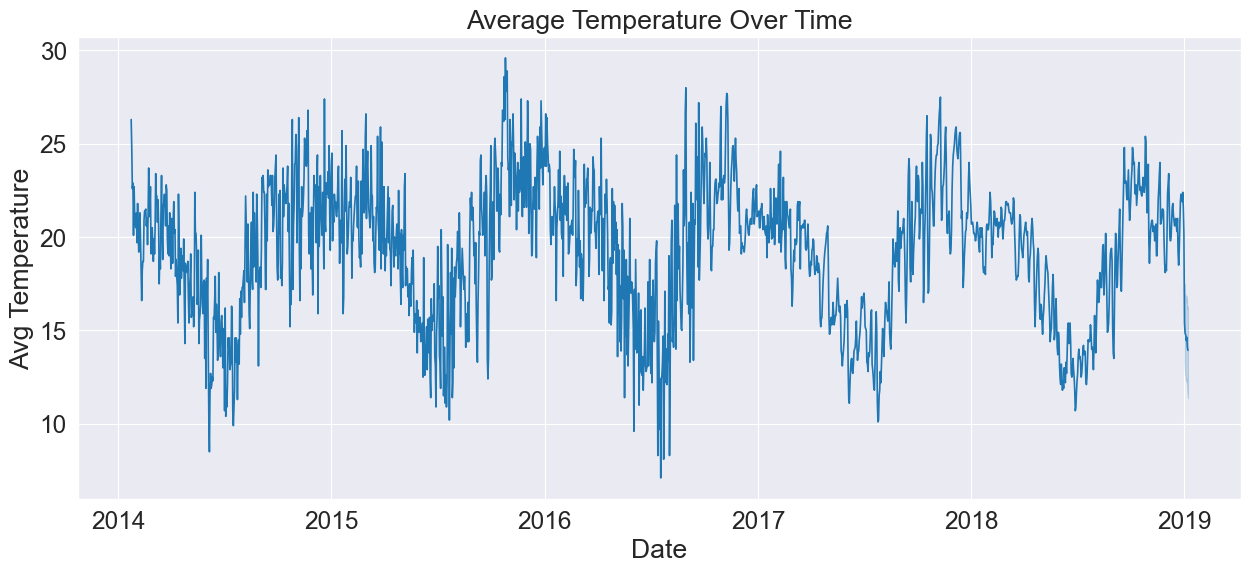

In [76]:
# Plot sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(y='avg_temp_c', x=temp_new.index, data=temp_new)
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Temperature')
plt.show()

In [77]:
out.to_csv('answers.csv',index=False)